<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap2_07_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第２章教師あり学習

## 07 ランダムフォレスト

In [1]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データの読み込み
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9629629629629629

テキストを見ると、学習させたモデルの中で持っている重要度を可視化するグラフが存在する。しかし、そのコードがないのでどうやっているかがわからない。
あとで調べてみる。

とりあえず下記コードは、1章2節にあった pandas を用いた可視化で今回のデータの種類を表示したもの。

In [2]:
import pandas as pd

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["kind"])
df = pd.concat([X, y], axis=1)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


恐らく、特徴量の重要度は feature_importances_  に格納されている。
個数を数えると、上記の表にもある属性の数と同じ13個のデータが格納されていたので、これがそのまま属性ごとの特徴量と考えられる。
これを棒グラフでプロットすると、後述の通り。
ただし、結果はテキストと完全に一致していないが重要度の高い方と低い方の傾向は似ているように見える。

[0.12047773 0.03598817 0.01089054 0.02274161 0.04874755 0.05403977
 0.14576781 0.00490871 0.02887156 0.12301548 0.08620058 0.09624452
 0.22210598]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


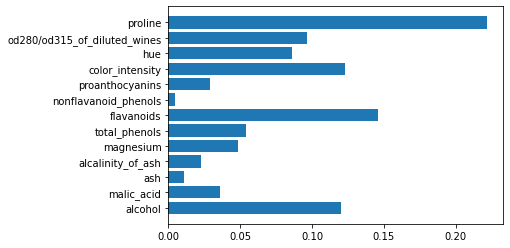

In [17]:
print(model.feature_importances_)
print(data.feature_names)

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

y_pos = np.arange(len(model.feature_importances_))
ax.barh(y_pos, model.feature_importances_)
ax.set_yticks(y_pos)
ax.set_yticklabels(data.feature_names)
plt.show()